# Driver Behavior Modelling

From the provided dataset, select at least 2 of the 5 driving maneuvers and determine the sequence of events (atomic actions) that are characteristic of each maneuver. It is essential to analyze and compare the results in a complete and realistic manner. Keep in mind that all files (users) corresponding to the same maneuver should be considered to ensure the events are as representative as possible.

**Error**: Typo in filename `Driver5/STISIMData_3step-Turning` should be `Driver5/STISIMData_3step-Turnings`

---

## Import libraries

In [79]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Load Sample Dataset

In [80]:
# Read data from 1 driver
data_path = 'data/'
drivers = list(os.listdir(data_path))
print("Drivers: " ,drivers)

maneuver_types = [f.split("_")[1].split(".")[0] for f in os.listdir(os.path.join(data_path, drivers[0]))]
print("Maneuvers set: ", maneuver_types)

sample_ind = 0
print(f"Load dataframe for driver {drivers[sample_ind]} and maneuver {maneuver_types[sample_ind]}")
df_path = os.path.join(data_path, drivers[sample_ind], f"STISIMData_{maneuver_types[sample_ind]}.xlsx")
df = pd.read_excel(df_path)
print("Dataframe size: ", df.shape)
df.head().T

Drivers:  ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
Maneuvers set:  ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
Load dataframe for driver Driver1 and maneuver 3step-Turnings
Dataframe size:  (8933, 23)


,0,1,2,3,4
Elapsed time,0.100,0.152,0.204,0.254,0.304
Long Dist,0.000,0.010,0.010,0.010,0.010
Lat Pos,2.170,2.170,2.170,2.170,2.170
Steering wheel angle,-8.240,-8.240,-8.240,-8.240,-8.240
Throttle input,0.000,0.000,0.000,0.000,0.000
Brake pedal force,1.360,1.360,1.360,1.360,1.360
Gas pedal,0.000,0.000,0.000,0.000,0.000
Brake pedal,0.000,0.000,0.000,0.000,0.000
Clutch pedal,0.000,0.000,0.000,0.000,0.000
Left turn,0.000,0.000,0.000,0.000,0.000


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elapsed time,8933.0,231.450399,133.734621,0.100,115.658,231.379,347.369,462.685
Long Dist,8933.0,1008.562714,601.896823,0.000,400.950,1047.500,1533.310,2049.750
Lat Pos,8933.0,0.310174,1.969614,-3.600,-1.690,1.120,1.800,4.330
Steering wheel angle,8933.0,-4.288223,229.965259,-466.580,-56.640,-2.060,14.420,414.060
Throttle input,8933.0,0.307297,0.270807,0.000,0.000,0.310,0.550,0.930
Brake pedal force,8933.0,4.866916,10.712076,1.360,1.360,1.360,1.360,87.160
Gas pedal,8933.0,19731.515392,17383.355246,0.000,0.000,20160.000,35405.000,59627.000
Brake pedal,8933.0,1187.196239,3626.100086,0.000,0.000,0.000,0.000,29041.000
Clutch pedal,8933.0,32681.562745,23721.195196,0.000,11565.000,25828.000,64253.000,64253.000
Left turn,8933.0,0.115527,0.319674,0.000,0.000,0.000,0.000,1.000


In [82]:
df.dtypes

Elapsed time            float64
Long Dist               float64
Lat Pos                 float64
Steering wheel angle    float64
Throttle input          float64
Brake pedal force       float64
Gas pedal                 int64
Brake pedal               int64
Clutch pedal              int64
Left turn                 int64
Right turn                int64
Gear                      int64
speed                   float64
RPM                     float64
Hand wheel torque       float64
Maneuver marker flag      int64
Accidents               float64
Collisions              float64
Peds Hit                float64
Speeding Tics           float64
Red Lgt Tics            float64
Speed Exceed            float64
Stop Sign Ticks         float64
dtype: object

## Load Data of Every Driver
5 drivers available, 4 used and 1 completely isolated for testing purposes

In [83]:
# dfs = []

# for driver in drivers[:-1]:
#     print(f"Load dataframe for driver {driver} and maneuver {maneuver_types[sample_ind]}")
#     df_path = os.path.join(data_path, driver, f"STISIMData_{maneuver_types[sample_ind]}.xlsx")
#     df_temp = pd.read_excel(df_path)
#     # TODO: guardar el Tmax de un driver y sumarselo al T0 del siguiente para poder concatenar?
#     dfs.append()


# # TODO: no creo que este bien concatenar asi del tiron...
# df = pd.concat(dfs, ignore_index=True)
# # df['Elapsed time'] = df['Elapsed time'].cumsum() esto tampoco

# print("Dataframe size: ", df.shape)
# df.tail()


## Data preprocessing

In [84]:
df.dropna(axis=1, inplace=True)
df.columns

Index(['Elapsed time', 'Long Dist', 'Lat Pos', 'Steering wheel angle',
       'Throttle input', 'Brake pedal force', 'Gas pedal', 'Brake pedal',
       'Clutch pedal', 'Left turn', 'Right turn', 'Gear', 'speed', 'RPM',
       'Hand wheel torque', 'Maneuver marker flag'],
      dtype='object')

## Dummy Working Example: Linear Regression

In [85]:
def create_lagged_features(df, features, lag=1):
    df = df.copy()  # Avoid modifying the original DataFrame
    for feature in features:
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
    df.dropna(inplace=True) # Remove rows with NaN values created by shift
    return df

# Example Usage:
features_to_lag = ['speed', 'Steering wheel angle', 'Throttle input', 'Brake pedal force', 'RPM'] 
lag_value = 5

df_lagged = create_lagged_features(df[features_to_lag + ["Maneuver marker flag"]], features_to_lag, lag=lag_value)
df_lagged.head().T


,5,6,7,8,9
speed,0.000,0.000,0.000,0.000,0.000
Steering wheel angle,-8.240,-8.240,-7.200,-8.240,-8.240
Throttle input,0.000,0.000,0.000,0.000,0.000
Brake pedal force,1.360,1.360,1.360,1.360,1.360
RPM,314.470,343.179,370.486,396.460,425.960
Maneuver marker flag,0.000,0.000,0.000,0.000,0.000
speed_lag5,0.060,0.040,0.020,0.000,0.000
Steering wheel angle_lag5,-8.240,-8.240,-8.240,-8.240,-8.240
Throttle input_lag5,0.000,0.000,0.000,0.000,0.000
Brake pedal force_lag5,1.360,1.360,1.360,1.360,1.360


In [86]:
target = "Maneuver marker flag"
df_lagged.dropna(inplace=True)
X = df_lagged.drop(columns=target)
y = df_lagged[target]
X.shape, y.shape

((8928, 10), (8928,))

In [87]:
# time based split
train_size = int(len(df_lagged) * 0.8)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [88]:
numerical_features = X_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values using a threshold
threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.9507278835386338
Precision: 0.9479638009049773
Recall: 0.9522727272727273
F1-Score: 0.9501133786848073
Confusion Matrix:
[[860  46]
 [ 42 838]]


C:\Users\maxi.rodriguez\AppData\Local\Temp\ipykernel_30792\2560742571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
C:\Users\maxi.rodriguez\AppData\Local\Temp\ipykernel_30792\2560742571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_features] = scaler.transform(X_test[numerical_features])


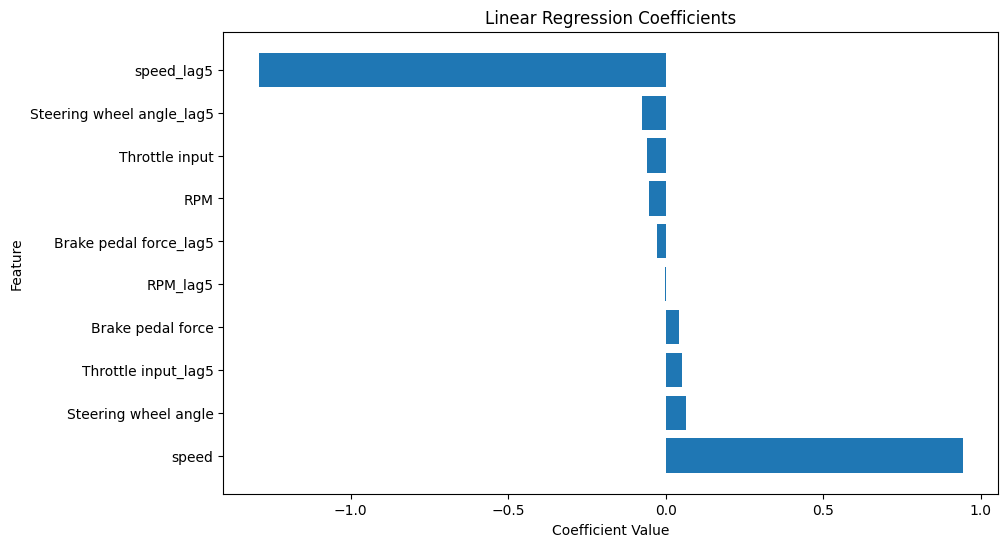

In [89]:
import matplotlib.pyplot as plt

coefficients = model.coef_
feature_names = X_train.columns  # Get feature names

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values('Coefficient', ascending=False) # Sort by impact

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients')
plt.show()

  0%|          | 0/1786 [00:00<?, ?it/s]

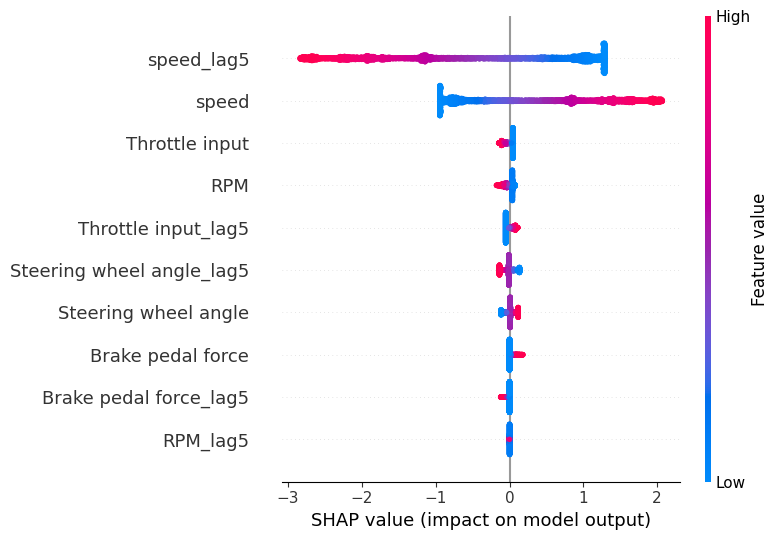

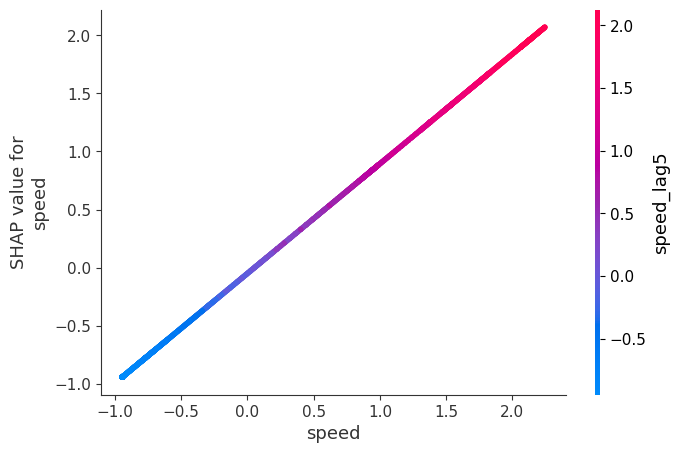

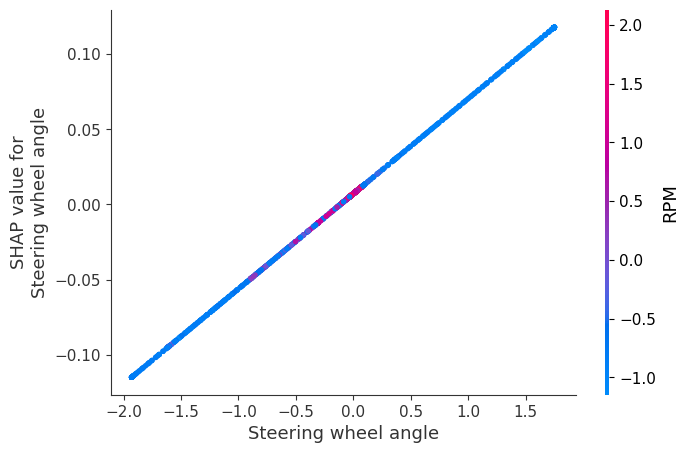

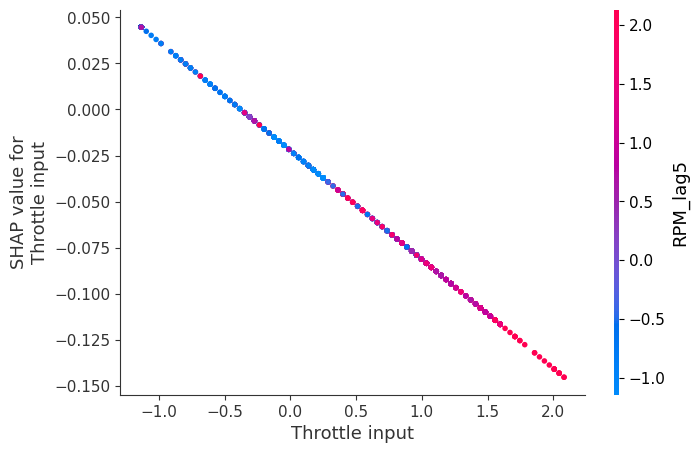

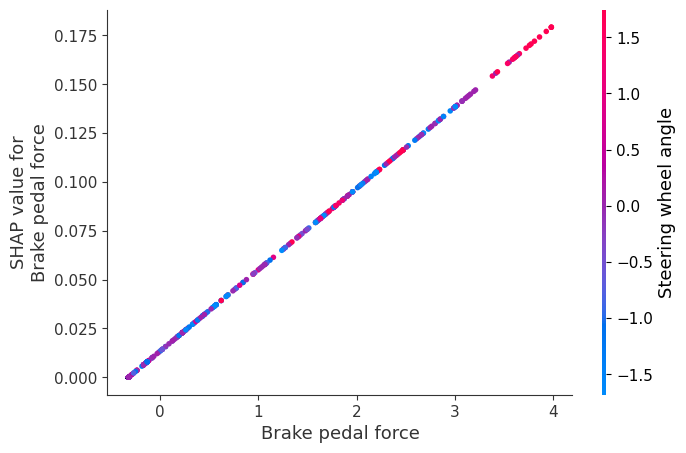

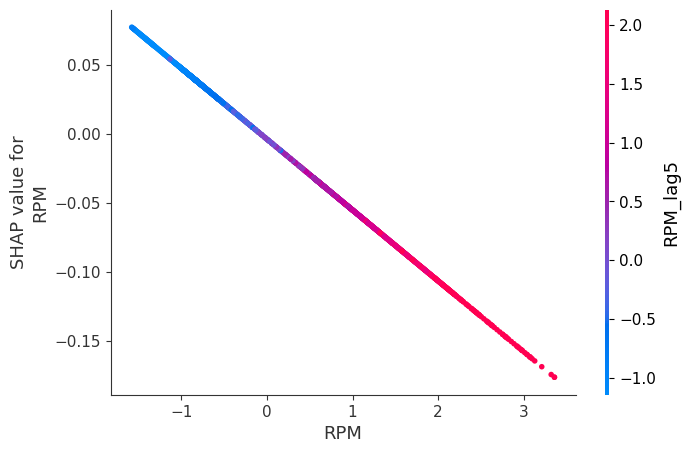

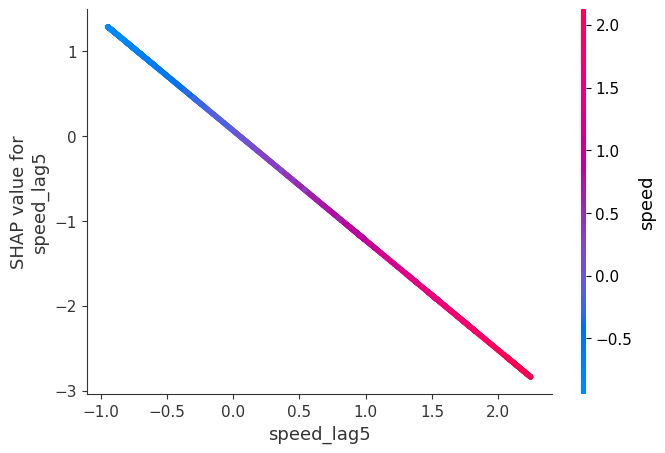

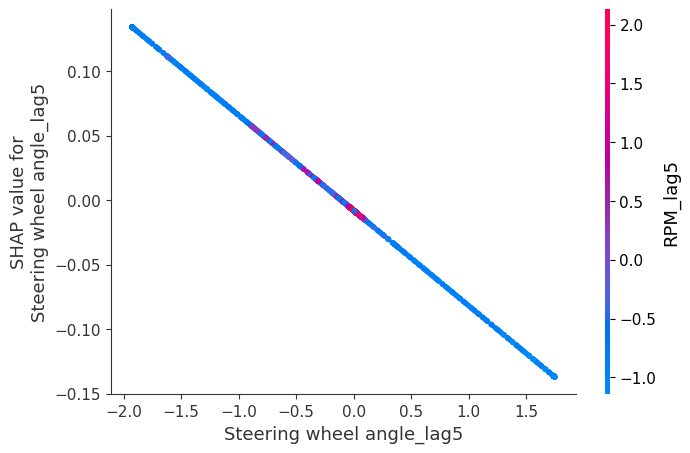

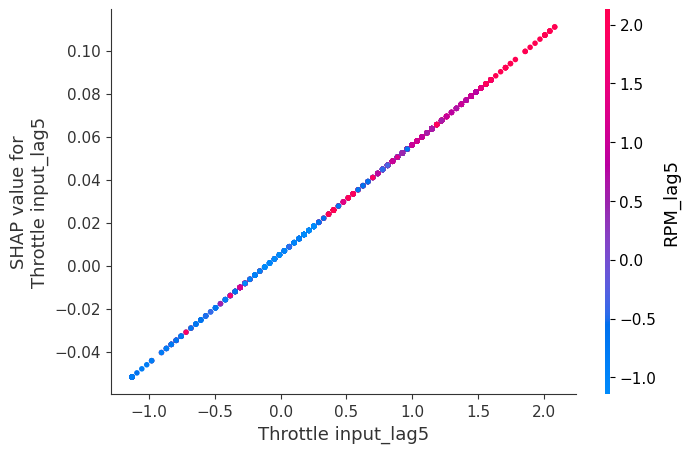

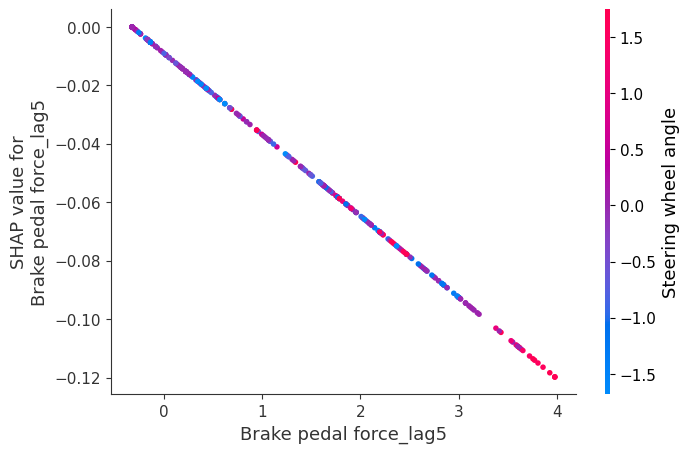

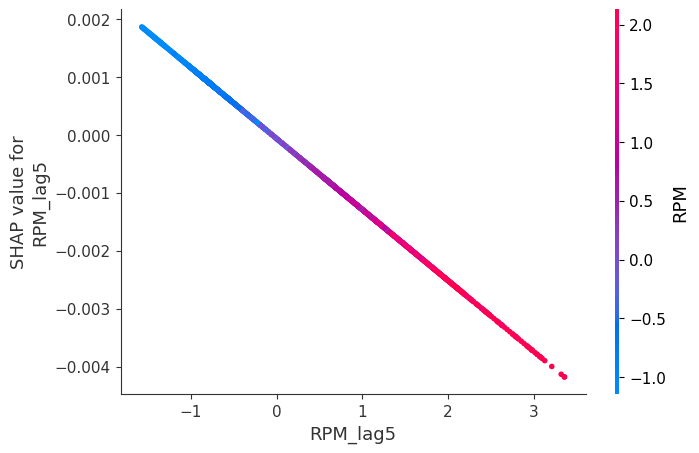

In [90]:
import shap

explainer = shap.KernelExplainer(model.predict, shap.sample(X_train, 10)) #Sample needed
shap_values = explainer.shap_values(X_test) #X_test

shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns) #X_test

instance_index = 0 # Choose an instance to explain (e.g., the first one)
shap.force_plot(explainer.expected_value, shap_values[instance_index,:], features=X_test.iloc[instance_index,:], feature_names = X_test.columns)

for feature in X_test.columns:
    shap.dependence_plot(feature, shap_values, features=X_test, feature_names = X_test.columns)